In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.abs(y_true)))

In [4]:
PATH = 'Ana Karen/Bases para regresiones.xlsx'
Medellin = pd.read_excel(PATH, sheet_name='base  modas dummy')
Medellin = Medellin[~Medellin['Sede Receptora'].isin(['Envigado', 'Bello', 'Copacabana', 'Sabaneta', 'Itagüí'])]
Medellin

Semana        Sede Receptora  Mañana  Noche  Tarde  Dinero  Documentos  \
0          1              Aranjuez       1      0      0       0           0   
1          1                 Belén       0      0      0       1           0   
2          1            Candelaria       0      0      1       0           0   
3          1              Castilla       0      1      0       0           0   
4          1       Doce de Octubre       0      0      0       0           0   
...      ...                   ...     ...    ...    ...     ...         ...   
3540     261               Popular       0      0      0       1           0   
3541     261  San Antonio de Prado       0      0      1       0           0   
3542     261            San Javier       1      0      0       0           0   
3543     261            Santa Cruz       0      1      0       1           0   
3544     261         Villa Hermosa       1      0      0       0           0   

      Tecnología  Ropa  Vehículos   ...  Miércoles  Jueves  Viernes  Sábado  \
0              1     0           0  ...          0       0        0       0   
1              0     0           0  ...          0       0        0       0   
2              1     0           0  ...          0       0        0       1   
3              1     0           0  ...          1       0        0       0   
4              1     0           0  ...          0       0        1       0   
...          ...   ...         ...  ...        ...     ...      ...     ...   
3540           0     0           0  ...          0       0        0       0   
3541           1     0           0  ...          0       0        0       0   
3542           1     0           0  ...          0       0        0       0   
3543           0     0           0  ...          0       1        0       0   
3544           1     0           0  ...          0       1        0       0   

      Atraco  Cosquilleo  Descuido  Raponazo  Engaño  total  hurtos  
0          1           0         0         0       0              5  
1          0           0         1         0       0              3  
2          0           0         1         0       0             24  
3          1           0         0         0       0             12  
4          1           0         0         0       0              1  
...      ...         ...       ...       ...     ...            ...  
3540       1           0         0         0       0              3  
3541       1           0         0         0       0              6  
3542       1           0         0         0       0              5  
3543       0           0         1         0       0              3  
3544       1           0         0         0       0             15  

[3536 rows x 37 columns]

In [5]:
aux_df = Medellin[['Sede Receptora', 'total  hurtos']]
aux_df = aux_df.pivot(index=None, columns='Sede Receptora', values='total  hurtos')
aux_df

Sede Receptora  Aranjuez  Belén  Buenos Aires  Candelaria  Castilla  \
0                    5.0    NaN           NaN         NaN       NaN   
1                    NaN    3.0           NaN         NaN       NaN   
2                    NaN    NaN           NaN        24.0       NaN   
3                    NaN    NaN           NaN         NaN      12.0   
4                    NaN    NaN           NaN         NaN       NaN   
...                  ...    ...           ...         ...       ...   
3540                 NaN    NaN           NaN         NaN       NaN   
3541                 NaN    NaN           NaN         NaN       NaN   
3542                 NaN    NaN           NaN         NaN       NaN   
3543                 NaN    NaN           NaN         NaN       NaN   
3544                 NaN    NaN           NaN         NaN       NaN   

Sede Receptora  Doce de Octubre  Laureles  Manrique  Poblado  Popular  \
0                           NaN       NaN       NaN      NaN      NaN   
1                           NaN       NaN       NaN      NaN      NaN   
2                           NaN       NaN       NaN      NaN      NaN   
3                           NaN       NaN       NaN      NaN      NaN   
4                           1.0       NaN       NaN      NaN      NaN   
...                         ...       ...       ...      ...      ...   
3540                        NaN       NaN       NaN      NaN      3.0   
3541                        NaN       NaN       NaN      NaN      NaN   
3542                        NaN       NaN       NaN      NaN      NaN   
3543                        NaN       NaN       NaN      NaN      NaN   
3544                        NaN       NaN       NaN      NaN      NaN   

Sede Receptora  San Antonio de Prado  San Javier  Santa Cruz  Villa Hermosa  
0                                NaN         NaN         NaN            NaN  
1                                NaN         NaN         NaN            NaN  
2                                NaN         NaN         NaN            NaN  
3                                NaN         NaN         NaN            NaN  
4                                NaN         NaN         NaN            NaN  
...                              ...         ...         ...            ...  
3540                             NaN         NaN         NaN            NaN  
3541                             6.0         NaN         NaN            NaN  
3542                             NaN         5.0         NaN            NaN  
3543                             NaN         NaN         3.0            NaN  
3544                             NaN         NaN         NaN           15.0  

[3536 rows x 14 columns]

In [6]:
#Se transforma el texto por el valor de uno, dado que no es de interés en el momento del tipo de robo
df = pd.concat([Medellin[['Semana']], aux_df], axis=1, sort=False).fillna(0)
df

Semana  Aranjuez  Belén  Buenos Aires  Candelaria  Castilla  \
0          1       5.0    0.0           0.0         0.0       0.0   
1          1       0.0    3.0           0.0         0.0       0.0   
2          1       0.0    0.0           0.0        24.0       0.0   
3          1       0.0    0.0           0.0         0.0      12.0   
4          1       0.0    0.0           0.0         0.0       0.0   
...      ...       ...    ...           ...         ...       ...   
3540     261       0.0    0.0           0.0         0.0       0.0   
3541     261       0.0    0.0           0.0         0.0       0.0   
3542     261       0.0    0.0           0.0         0.0       0.0   
3543     261       0.0    0.0           0.0         0.0       0.0   
3544     261       0.0    0.0           0.0         0.0       0.0   

      Doce de Octubre  Laureles  Manrique  Poblado  Popular  \
0                 0.0       0.0       0.0      0.0      0.0   
1                 0.0       0.0       0.0      0.0      0.0   
2                 0.0       0.0       0.0      0.0      0.0   
3                 0.0       0.0       0.0      0.0      0.0   
4                 1.0       0.0       0.0      0.0      0.0   
...               ...       ...       ...      ...      ...   
3540              0.0       0.0       0.0      0.0      3.0   
3541              0.0       0.0       0.0      0.0      0.0   
3542              0.0       0.0       0.0      0.0      0.0   
3543              0.0       0.0       0.0      0.0      0.0   
3544              0.0       0.0       0.0      0.0      0.0   

      San Antonio de Prado  San Javier  Santa Cruz  Villa Hermosa  
0                      0.0         0.0         0.0            0.0  
1                      0.0         0.0         0.0            0.0  
2                      0.0         0.0         0.0            0.0  
3                      0.0         0.0         0.0            0.0  
4                      0.0         0.0         0.0            0.0  
...                    ...         ...         ...            ...  
3540                   0.0         0.0         0.0            0.0  
3541                   6.0         0.0         0.0            0.0  
3542                   0.0         5.0         0.0            0.0  
3543                   0.0         0.0         3.0            0.0  
3544                   0.0         0.0         0.0           15.0  

[3536 rows x 15 columns]

In [7]:
df = df.groupby('Semana').sum()
df

Aranjuez  Belén  Buenos Aires  Candelaria  Castilla  Doce de Octubre  \
Semana                                                                         
1            5.0    3.0           0.0        24.0      12.0              1.0   
2            6.0    1.0           5.0        28.0       8.0              3.0   
3            6.0   12.0           4.0        65.0      18.0              0.0   
4           13.0   10.0           4.0        74.0      20.0              3.0   
5           13.0   16.0           2.0        77.0      19.0              4.0   
...          ...    ...           ...         ...       ...              ...   
257         29.0   60.0          27.0       182.0      61.0              8.0   
258         38.0   65.0           9.0       189.0      54.0             15.0   
259         37.0   56.0          20.0       172.0      44.0             13.0   
260         27.0   38.0          24.0       140.0      45.0              6.0   
261         19.0   51.0          11.0       151.0      36.0              8.0   

        Laureles  Manrique  Poblado  Popular  San Antonio de Prado  \
Semana                                                               
1           10.0       2.0      7.0      0.0                   0.0   
2            5.0       0.0      2.0      0.0                   0.0   
3           18.0       2.0      9.0      0.0                   0.0   
4           17.0       5.0      5.0      1.0                   0.0   
5           14.0       3.0     15.0      1.0                   2.0   
...          ...       ...      ...      ...                   ...   
257        128.0      11.0     83.0      9.0                   3.0   
258         70.0      12.0     66.0      5.0                   4.0   
259         96.0       7.0     79.0      8.0                   5.0   
260         58.0      10.0     42.0     10.0                   4.0   
261         38.0       5.0     26.0      3.0                   6.0   

        San Javier  Santa Cruz  Villa Hermosa  
Semana                                         
1              3.0         0.0            2.0  
2              2.0         1.0            3.0  
3              2.0         2.0            1.0  
4              0.0         1.0            5.0  
5              3.0         2.0            5.0  
...            ...         ...            ...  
257           14.0         1.0           13.0  
258            7.0         4.0           14.0  
259            8.0         4.0           12.0  
260            7.0         5.0            6.0  
261            5.0         3.0           15.0  

[261 rows x 14 columns]

In [8]:
#Tamaño de los datos (Estos aún no sirven para la red neuronal)
print (df.shape)

(261, 14)


### PASO 2: Transformación de los datos

División de los datos en train y test. Se dividen los datos de acuerdo al orden temporal.

In [9]:
X = df.values
split_train = 0.9 #Porcentaje de datos usados para entrenamiento
train_size = int(len(X) * split_train)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 261
Training Observations: 234
Testing Observations: 27


In [10]:
'''
Función para transformar los datos en serie de tiempo con efecto auto-regresivo
'''

def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)


def create_datasetMV(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)

Para procesar los datos en la red neuronal, se deben **transformar** los datos de entrada. Para este ejemplo se transformar para que estén en un intervalo de 0 a 1. Luego para mostrar los resultados se debe hacer la **transformada inversa**. La transformada se hace sobre los datos de entrenamiento (fit), para evitar transferir información a los datos de testeo (transform).

In [11]:
from sklearn.preprocessing import MinMaxScaler

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)

In [12]:
look_back = 1 #Equivale a número de periodos que veré hacia atrás para hacer una predicción

X_train, y_train = create_datasetMV(trainN, look_back)
X_test, y_test = create_datasetMV(testN, look_back)

In [13]:
print(train.shape)
print(trainN.shape)
print('Datos para red neural: Entrada', X_train.shape)
print('Datos para red neural: Salida', y_train.shape)
print('---')
print(test.shape)
print(testN.shape)
print('Datos para red neural: Entrada', X_test.shape)
print('Datos para red neural: Salida', y_test.shape)

(234, 14)
(234, 14)
Datos para red neural: Entrada (233, 1, 14)
Datos para red neural: Salida (233, 14)
---
(27, 14)
(27, 14)
Datos para red neural: Entrada (26, 1, 14)
Datos para red neural: Salida (26, 14)


In [14]:
X_train[0,:,:] # Valor t-1 de los robos para predecir en t (por comuna)

array([[0.0625    , 0.01941748, 0.        , 0.08947368, 0.16949153,
        0.05882353, 0.03535354, 0.0952381 , 0.05813953, 0.        ,
        0.        , 0.21428571, 0.        , 0.11764706]])

In [15]:
y_train[0,:] #Valor de los robos en el tiempo t que se quiere predecir (por comuna)

array([0.08333333, 0.        , 0.2173913 , 0.11052632, 0.10169492,
       0.17647059, 0.01010101, 0.        , 0.        , 0.        ,
       0.        , 0.14285714, 0.125     , 0.17647059])

### PASO 3: Modelamiento a través de redes neuronales

### 3.1 Red Neuronal Clásica

Primero se modela los datos a través de una red neural sencilla para tener una base de comparación.

El modelo está compuesto por dos capas densas de 22 neuronas. Este modelo es el **baseline**.

Sobre el **optimizador** se utiliza Adam porque es en general es el que presenta mejor desempeño. Los hiperparámetros del optimizador se toman los recomendados. Se puede mirar el siguiente enlace para mayor información:

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [16]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, RepeatVector, TimeDistributed, LSTM, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

In [17]:
AR = look_back
print('Número de rezagos, es como un: AR(',AR,')')
Num_comunas = X_train.shape[2]
print('El número de comunas para predecir:',Num_comunas)

Número de rezagos, es como un: AR( 1 )
El número de comunas para predecir: 14


Esquema secuencial

In [28]:
keras.backend.clear_session()
model1 = Sequential()
model1.add(Dense(22, activation='selu', input_shape=(AR,Num_comunas)))
model1.add(Dropout(0.2))
model1.add(keras.layers.Flatten())
model1.add(Dense(22, activation='selu'))
model1.add(Dropout(0.2))
model1.add(Dense(Num_comunas))
Optimi = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model1.compile(optimizer=Optimi, loss='mae', metrics=['mean_squared_error'])
#model1.compile(optimizer='Adam', loss='mae', metrics=['mean_squared_error']) #Toma valores por defecto del optimizador
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 22)             330       
_________________________________________________________________
dropout (Dropout)            (None, 1, 22)             0         
_________________________________________________________________
flatten (Flatten)            (None, 22)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 22)                506       
_________________________________________________________________
dropout_1 (Dropout)          (None, 22)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 14)                322       
Total params: 1,158
Trainable params: 1,158
Non-trainable params: 0
______________________________________________________

In [19]:
model1.fit(X_train,y_train,epochs=72, verbose=1, validation_split=0.15)

Train on 198 samples, validate on 35 samples
Epoch 1/72
198/198 [==============================] - 1s 8ms/sample - loss: 0.5524 - mean_squared_error: 0.5219 - val_loss: 0.6273 - val_mean_squared_error: 0.6262
Epoch 2/72
198/198 [==============================] - 0s 836us/sample - loss: 0.4534 - mean_squared_error: 0.3582 - val_loss: 0.4954 - val_mean_squared_error: 0.3858
Epoch 3/72
198/198 [==============================] - 0s 744us/sample - loss: 0.3816 - mean_squared_error: 0.2555 - val_loss: 0.4153 - val_mean_squared_error: 0.2663
Epoch 4/72
198/198 [==============================] - 0s 904us/sample - loss: 0.3456 - mean_squared_error: 0.2038 - val_loss: 0.3626 - val_mean_squared_error: 0.2001
Epoch 5/72
198/198 [==============================] - 0s 825us/sample - loss: 0.3098 - mean_squared_error: 0.1629 - val_loss: 0.3230 - val_mean_squared_error: 0.1593
Epoch 6/72
198/198 [==============================] - 0s 918us/sample - loss: 0.2879 - mean_squared_error: 0.1434 - val_loss: 0

Epoch 50/72
198/198 [==============================] - 0s 406us/sample - loss: 0.1198 - mean_squared_error: 0.0263 - val_loss: 0.1433 - val_mean_squared_error: 0.0350
Epoch 51/72
198/198 [==============================] - 0s 431us/sample - loss: 0.1261 - mean_squared_error: 0.0291 - val_loss: 0.1449 - val_mean_squared_error: 0.0357
Epoch 52/72
198/198 [==============================] - 0s 444us/sample - loss: 0.1224 - mean_squared_error: 0.0273 - val_loss: 0.1388 - val_mean_squared_error: 0.0332
Epoch 53/72
198/198 [==============================] - ETA: 0s - loss: 0.1235 - mean_squared_error: 0.02 - 0s 2ms/sample - loss: 0.1231 - mean_squared_error: 0.0279 - val_loss: 0.1411 - val_mean_squared_error: 0.0343
Epoch 54/72
198/198 [==============================] - 0s 745us/sample - loss: 0.1235 - mean_squared_error: 0.0280 - val_loss: 0.1421 - val_mean_squared_error: 0.0346
Epoch 55/72
198/198 [==============================] - 0s 574us/sample - loss: 0.1207 - mean_squared_error: 0.0266 

En el siguiente enlace:

https://stackoverflow.com/questions/47302085/what-is-metrics-in-keras/47306502#47306502

Se puede consultar la diferencia entre **metric** y **loss**


In [20]:
# list all data in history
print(model1.history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


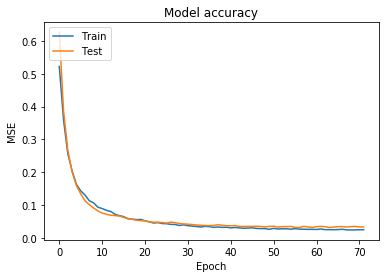

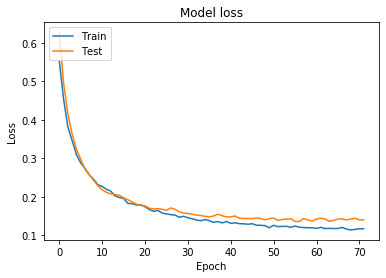

In [21]:
# Plot training & validation metrics
plt.plot(model1.history.history['mean_squared_error'])
plt.plot(model1.history.history['val_mean_squared_error'])
plt.title('Model accuracy')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model1.history.history['loss'])
plt.plot(model1.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
y_predict = model1.predict([X_test])
y_predict_inv = scaler.inverse_transform(y_predict)
y_test_inv = scaler.inverse_transform(y_test)
print('RMSE de este modelo es:', np.sqrt(mean_squared_error(y_test_inv, y_predict_inv)))
print('MAPE de este modelo es:', mean_absolute_percentage_error(y_test_inv, y_predict_inv))

RMSE de este modelo es: 17.845717089163973
MAPE de este modelo es: inf


In [23]:
y_predict = model1.predict(X_test)
y_predict_inv = scaler.inverse_transform(y_predict)
y_test_inv = scaler.inverse_transform(y_test)

#Visualización Predicción para un tiempo
sedes = Medellin['Sede Receptora'].unique()
Output = pd.DataFrame({'Sedes' : sedes})
Output['y_test'] = 0
Output['y_test'] = y_test_inv[0]
Output['y_predict'] = 0
Output['y_predict'] = y_predict_inv[0] 
Output['Diff'] = 0
Output['Diff'] = (y_test_inv[0] - y_predict_inv[0])
Output

Sedes  y_test   y_predict       Diff
0               Aranjuez    21.0   20.965513   0.034487
1                  Belén    56.0   45.799370  10.200630
2             Candelaria    11.0   11.723497  -0.723497
3               Castilla   181.0  152.054260  28.945740
4        Doce de Octubre    39.0   37.285286   1.714714
5               Laureles    12.0    7.336167   4.663833
6               Manrique    55.0   74.907486 -19.907486
7                Poblado     8.0    6.310866   1.689134
8             San Javier    45.0   46.080029  -1.080029
9          Villa Hermosa     4.0    2.852465   1.147535
10          Buenos Aires     1.0    1.513248  -0.513248
11            Santa Cruz    14.0    5.170294   8.829706
12               Popular     1.0    2.949497  -1.949497
13  San Antonio de Prado     8.0    6.786027   1.213973

### 3.2 Red Neuronal Recurrente

Primero se modela los datos a través de una red neural sencilla para tener una base de comparación.

El modelo está compuesto por dos capas densas de 22 neuronas. Este modelo es el **baseline**.

In [24]:
keras.backend.clear_session()
model2 = Sequential()
model2.add(SimpleRNN(22, activation='selu', input_shape=(AR,Num_comunas)))
model2.add(Dropout(0.1))
model2.add(Dense(22, activation='selu'))
model2.add(Dropout(0.1))
model2.add(Dense(Num_comunas))
model2.compile(optimizer='adam', loss='mae', metrics=['mean_squared_error'])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 22)                814       
_________________________________________________________________
dropout (Dropout)            (None, 22)                0         
_________________________________________________________________
dense (Dense)                (None, 22)                506       
_________________________________________________________________
dropout_1 (Dropout)          (None, 22)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 14)                322       
Total params: 1,642
Trainable params: 1,642
Non-trainable params: 0
_________________________________________________________________


In [25]:
model2.fit(X_train,y_train,epochs=80, verbose=1, validation_split=0.15)

Train on 198 samples, validate on 35 samples
Epoch 1/80
198/198 [==============================] - 3s 13ms/sample - loss: 0.5080 - mean_squared_error: 0.4542 - val_loss: 0.5109 - val_mean_squared_error: 0.4590
Epoch 2/80
198/198 [==============================] - 0s 227us/sample - loss: 0.4000 - mean_squared_error: 0.2803 - val_loss: 0.3863 - val_mean_squared_error: 0.2651
Epoch 3/80
198/198 [==============================] - 0s 315us/sample - loss: 0.3282 - mean_squared_error: 0.1849 - val_loss: 0.3289 - val_mean_squared_error: 0.1785
Epoch 4/80
198/198 [==============================] - 0s 312us/sample - loss: 0.3011 - mean_squared_error: 0.1546 - val_loss: 0.2959 - val_mean_squared_error: 0.1343
Epoch 5/80
198/198 [==============================] - 0s 287us/sample - loss: 0.2669 - mean_squared_error: 0.1190 - val_loss: 0.2584 - val_mean_squared_error: 0.1016
Epoch 6/80
198/198 [==============================] - 0s 287us/sample - loss: 0.2523 - mean_squared_error: 0.1070 - val_loss: 

Epoch 50/80
198/198 [==============================] - 0s 247us/sample - loss: 0.1207 - mean_squared_error: 0.0265 - val_loss: 0.1565 - val_mean_squared_error: 0.0414
Epoch 51/80
198/198 [==============================] - 0s 252us/sample - loss: 0.1194 - mean_squared_error: 0.0265 - val_loss: 0.1527 - val_mean_squared_error: 0.0391
Epoch 52/80
198/198 [==============================] - 0s 257us/sample - loss: 0.1163 - mean_squared_error: 0.0246 - val_loss: 0.1532 - val_mean_squared_error: 0.0393
Epoch 53/80
198/198 [==============================] - 0s 236us/sample - loss: 0.1167 - mean_squared_error: 0.0249 - val_loss: 0.1534 - val_mean_squared_error: 0.0395
Epoch 54/80
198/198 [==============================] - 0s 232us/sample - loss: 0.1198 - mean_squared_error: 0.0259 - val_loss: 0.1533 - val_mean_squared_error: 0.0390
Epoch 55/80
198/198 [==============================] - 0s 232us/sample - loss: 0.1196 - mean_squared_error: 0.0262 - val_loss: 0.1535 - val_mean_squared_error: 0.039

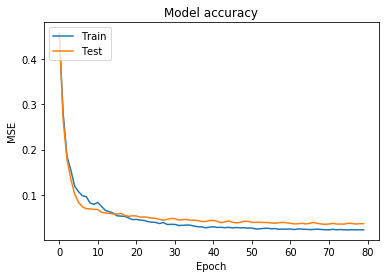

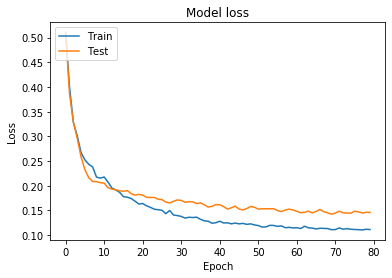

In [26]:
# Plot training & validation metrics
plt.plot(model2.history.history['mean_squared_error'])
plt.plot(model2.history.history['val_mean_squared_error'])
plt.title('Model accuracy')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model2.history.history['loss'])
plt.plot(model2.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
y_predict = model2.predict(X_test)
y_predict_inv = scaler.inverse_transform(y_predict)
y_test_inv = scaler.inverse_transform(y_test)
print('RMSE de este modelo es:', np.sqrt(mean_squared_error(y_predict_inv, y_test_inv)))

RMSE de este modelo es: 18.155093182081895


In [28]:
#Visualización Predicción para un tiempo
sedes = Medellin['Sede Receptora'].unique()
Output = pd.DataFrame({'Sedes' : sedes})
Output['y_test'] = 0
Output['y_test'] = y_test_inv[0]
Output['y_predict'] = 0
Output['y_predict'] = y_predict_inv[0] 
Output['Diff'] = 0
Output['Diff'] = (y_test_inv[0] - y_predict_inv[0])
Output

Sedes  y_test   y_predict       Diff
0               Aranjuez    21.0   23.903402  -2.903402
1                  Belén    56.0   50.416222   5.583778
2             Candelaria    11.0   12.815366  -1.815366
3               Castilla   181.0  148.352692  32.647308
4        Doce de Octubre    39.0   41.449039  -2.449039
5               Laureles    12.0    7.708736   4.291264
6               Manrique    55.0   85.446404 -30.446404
7                Poblado     8.0    6.436555   1.563445
8             San Javier    45.0   56.402828 -11.402828
9          Villa Hermosa     4.0    3.238421   0.761579
10          Buenos Aires     1.0    1.829097  -0.829097
11            Santa Cruz    14.0    7.391905   6.608095
12               Popular     1.0    2.666470  -1.666470
13  San Antonio de Prado     8.0    6.850747   1.149253

### 3.3 Red Neuronal Recurrente: GRU

La recurrente es común el overfitting y problemasd de estabilidad. La LSTM que es una mejora de esta última tiene demasiados parámatros lo que lo hace inviable de entrada para usarlo con tan pocos datos. Por tanto se usa la GRU que es una versión resumida de la LSTM

In [29]:
keras.backend.clear_session()
model3 = Sequential()
model3.add(GRU(22, activation='selu', input_shape=(AR,Num_comunas)))
model3.add(Dropout(0.1))
model3.add(Dense(22, activation='selu'))
model3.add(Dropout(0.1))

model3.add(Dense(Num_comunas))
model3.compile(optimizer='adam', loss='mae', metrics=['mean_squared_error'])
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 22)                2508      
_________________________________________________________________
dropout (Dropout)            (None, 22)                0         
_________________________________________________________________
dense (Dense)                (None, 22)                506       
_________________________________________________________________
dropout_1 (Dropout)          (None, 22)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 14)                322       
Total params: 3,336
Trainable params: 3,336
Non-trainable params: 0
_________________________________________________________________


In [30]:
model3.fit(X_train,y_train,epochs=64, verbose=1, validation_split=0.15)

Train on 198 samples, validate on 35 samples
Epoch 1/64
198/198 [==============================] - 3s 16ms/sample - loss: 0.2855 - mean_squared_error: 0.1281 - val_loss: 0.3873 - val_mean_squared_error: 0.2040
Epoch 2/64
198/198 [==============================] - 0s 273us/sample - loss: 0.2379 - mean_squared_error: 0.0946 - val_loss: 0.3261 - val_mean_squared_error: 0.1508
Epoch 3/64
198/198 [==============================] - 0s 275us/sample - loss: 0.2022 - mean_squared_error: 0.0706 - val_loss: 0.2711 - val_mean_squared_error: 0.1083
Epoch 4/64
198/198 [==============================] - 0s 277us/sample - loss: 0.1743 - mean_squared_error: 0.0547 - val_loss: 0.2149 - val_mean_squared_error: 0.0742
Epoch 5/64
198/198 [==============================] - 0s 274us/sample - loss: 0.1544 - mean_squared_error: 0.0432 - val_loss: 0.1756 - val_mean_squared_error: 0.0523
Epoch 6/64
198/198 [==============================] - 0s 262us/sample - loss: 0.1480 - mean_squared_error: 0.0396 - val_loss: 

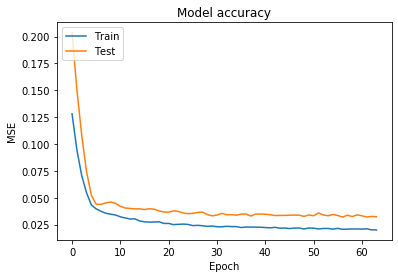

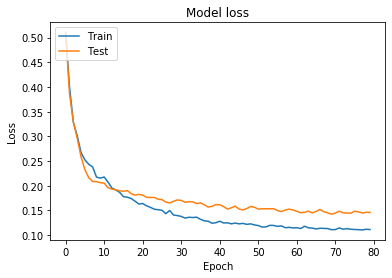

In [31]:
# Plot training & validation metrics
plt.plot(model3.history.history['mean_squared_error'])
plt.plot(model3.history.history['val_mean_squared_error'])
plt.title('Model accuracy')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model2.history.history['loss'])
plt.plot(model2.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [32]:
y_predict = model3.predict(X_test)
y_predict_inv = scaler.inverse_transform(y_predict)
y_test_inv = scaler.inverse_transform(y_test)

print('RMSE de este modelo es:', np.sqrt(mean_squared_error(y_predict_inv, y_test_inv)))

RMSE de este modelo es: 18.07589323395021


In [33]:
#Visualización Predicción para un tiempo
sedes = Medellin['Sede Receptora'].unique()
Output = pd.DataFrame({'Sedes' : sedes})
Output['y_test'] = 0
Output['y_test'] = y_test_inv[0]
Output['y_predict'] = 0
Output['y_predict'] = y_predict_inv[0] 
Output['Diff'] = 0
Output['Diff'] = (y_test_inv[0] - y_predict_inv[0])
Output

Sedes  y_test   y_predict       Diff
0               Aranjuez    21.0   23.911522  -2.911522
1                  Belén    56.0   53.761654   2.238346
2             Candelaria    11.0   12.820987  -1.820987
3               Castilla   181.0  171.916153   9.083847
4        Doce de Octubre    39.0   42.177601  -3.177601
5               Laureles    12.0    8.458379   3.541621
6               Manrique    55.0   82.711189 -27.711189
7                Poblado     8.0    6.834455   1.165545
8             San Javier    45.0   54.209435  -9.209435
9          Villa Hermosa     4.0    3.483984   0.516016
10          Buenos Aires     1.0    1.865338  -0.865338
11            Santa Cruz    14.0    5.990078   8.009922
12               Popular     1.0    2.822020  -1.822020
13  San Antonio de Prado     8.0    7.147119   0.852881

## 4. Selección del modelo de redes neuronales

El punto 3 vimos la implementación de 3 redes neuronales con arquitecturas distintas con el objetivo de validar si se contaba con toda la información y los parámetros para su desarrollo. Una vez claro esto, en este punto se hará un proceso de alto costo computacional donde se calificará cada uno de los modelos de acuerdo a una métrica variando sus hiperparámetros o los datos de entrenamiento:

* De cara a los datos, se modifica la componente "auto-regresiva".
* De cara a los parámetros se modifica el número de neuronas.
* De cara a la estructura se varía entre tradicional, RNN sencilla y GRU.

In [18]:
def TrainModel_ts(X_train, y_train, AR, Num_comunas, numN_capa1=22, layer='Dense'):
    keras.backend.clear_session()
    model = Sequential()
    if layer == 'SimpleRNN':
        model.add(SimpleRNN(numN_capa1, activation='selu', dropout=0.2, recurrent_dropout=0.2, input_shape=(AR,Num_comunas)))
        model.add(Dense(numN_capa1, activation='selu'))
        model.add(Dropout(0.2))
    elif layer == 'LSTM':
        model.add(LSTM(numN_capa1, activation='selu', dropout=0.2, recurrent_dropout=0.2, input_shape=(AR,Num_comunas)))
        model.add(Dense(numN_capa1, activation='selu'))
        model.add(Dropout(0.2))
    elif layer == 'GRU':
        model.add(GRU(numN_capa1, activation='selu', dropout=0.2, recurrent_dropout=0.2, input_shape=(AR,Num_comunas)))
        model.add(Dense(numN_capa1, activation='selu'))
        model.add(Dropout(0.2))
    else:
        model.add(Dense(numN_capa1, activation='selu', input_shape=(AR,Num_comunas)))
        model.add(Dropout(0.2))
        model.add(keras.layers.Flatten())
        model.add(Dense(numN_capa1, activation='selu'))
        model.add(Dropout(0.2))
        
    model.add(Dense(Num_comunas))
    Optimi = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(optimizer=Optimi,loss='mae',metrics=['mean_squared_error'])
    stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
    model.fit(X_train, y_train, epochs=120, validation_split=0.1, verbose=0, callbacks=[stop])
    return model

In [35]:
mse = np.zeros((4, 5, 6)) # X modelos, Y rezagos y Z numuero de nueronas por capa.
numN_capa1 = [1*Num_comunas, 2*Num_comunas, 3*Num_comunas, 4*Num_comunas, 5*Num_comunas, 10*Num_comunas]

for i, cell in enumerate(['Dense', 'SimpleRNN', 'LSTM', 'GRU']):
    for AR in range(1,6):
        look_back = AR #Equivale a número de periodos que veré hacia atrás para hacer una predicción
        X_train, y_train = create_datasetMV(trainN, look_back)
        X_test, y_test = create_datasetMV(testN, look_back)
        for j, numN in enumerate(numN_capa1):
            model = TrainModel_ts(X_train, y_train, AR, Num_comunas, numN, layer=cell)         
            
            y_predict = model.predict(X_test)
            y_predict_inv = scaler.inverse_transform(y_predict)
            y_test_inv = scaler.inverse_transform(y_test)
                                 
            mse[i,AR-1,j] = np.sqrt(mean_squared_error(y_predict_inv, y_test_inv))

In [36]:
mse#[0,:,2]

array([[[18.58113216, 17.78138287, 17.67753349, 18.04738971,
         17.97540116, 17.03670723],
        [18.50672512, 18.09845982, 17.58361234, 18.10237123,
         19.22679921, 19.86155411],
        [19.94724025, 18.80266741, 18.85136475, 18.73422199,
         19.11195913, 18.380913  ],
        [18.84395835, 18.84060584, 20.26217081, 18.93701584,
         18.92040718, 19.39696185],
        [22.3199811 , 20.72439152, 20.19571509, 20.10028459,
         21.25341388, 20.23873896]],

       [[16.77776614, 19.05122939, 18.25048903, 18.8041123 ,
         17.66037215, 18.13639339],
        [17.32193113, 17.67421528, 17.67442829, 18.05303932,
         17.79293206, 18.40550644],
        [19.67493253, 18.44412939, 18.28976129, 18.12364161,
         17.83053873, 18.49526442],
        [18.29285232, 17.53244787, 20.04917837, 18.46860258,
         19.35531124, 18.72214031],
        [18.4029052 , 21.10454132, 25.18280051, 20.07132088,
         19.52601146, 18.52592869]],

       [[17.25726183, 17.0

Conjunto de redes neuronales considerando sin variables categóricas


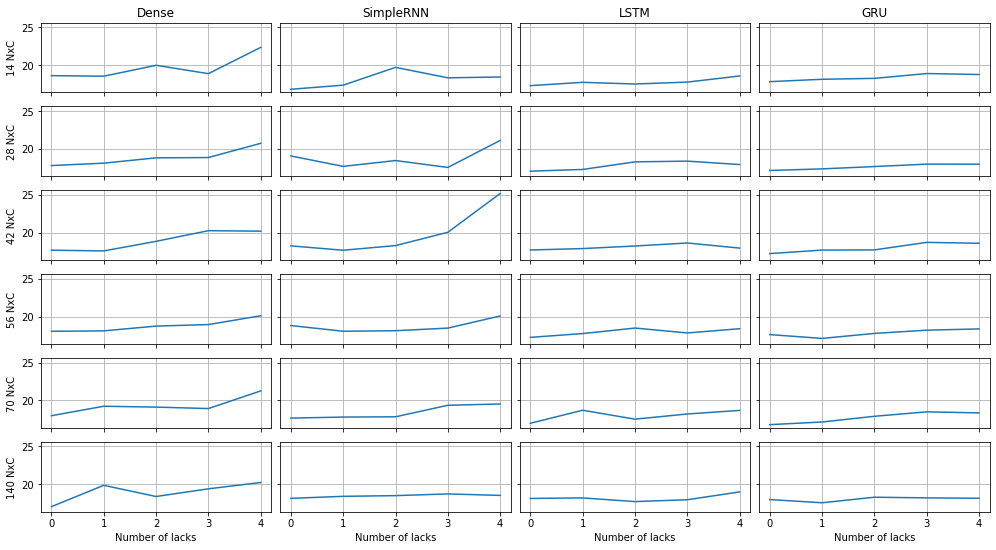

In [37]:
print('Conjunto de redes neuronales considerando sin variables categóricas')

fig, axs = plt.subplots(6, 4, figsize=(17, 9), facecolor='w', edgecolor='k', sharex=True, sharey=True)
fig.subplots_adjust(hspace = .2, wspace=.04)
name_models = ['Dense', 'SimpleRNN', 'LSTM', 'GRU']

axs = axs.ravel()
aux_index_AR = 0
aux_index_mod = 0
for i in range(24):
    axs[i].plot(range(5),mse[aux_index_AR,:,aux_index_mod])
    if i == 0:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    elif i == 4:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    elif i == 8:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    elif i == 12:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    elif i == 16:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    elif i == 20:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    elif i == 24:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    else:
        pass
    if i > 19:
        axs[i].set_xlabel('Number of lacks')
    if i <= 3:
        axs[i].set_title(name_models[aux_index_AR])
    axs[i].grid()
    aux_index_AR += 1
    if aux_index_AR%4 == 0:
        aux_index_AR = 0
        aux_index_mod += 1
    else:
        pass

### 5. Red Neuronal Multimodal

Buscamos que la base de datos de la Dummies tenga el mismo tamaño con los que se entrenó la red neural, para esto es necesario agrupar la tabla y dejar las dummies originales, o sea que se va a tener una tabla de gran dimensión (**comuna x dummies**)

Links de interés para agrupar la información:

https://stackoverflow.com/questions/44165629/pandas-pivot-table-for-multiple-columns-at-once

https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/


In [16]:
Dummies = Medellin.drop('total  hurtos', axis=1)
Dummies_grouped = Medellin.pivot(index = 'Semana', columns = 'Sede Receptora').fillna(0)
Dummies_grouped

Mañana                                         \
Sede Receptora Aranjuez Belén Buenos Aires Candelaria Castilla   
Semana                                                           
1                   1.0   0.0          0.0        0.0      0.0   
2                   0.0   0.0          0.0        1.0      0.0   
3                   0.0   0.0          1.0        0.0      1.0   
4                   1.0   0.0          0.0        0.0      1.0   
5                   0.0   1.0          0.0        0.0      1.0   
...                 ...   ...          ...        ...      ...   
257                 1.0   1.0          0.0        0.0      1.0   
258                 1.0   0.0          0.0        1.0      1.0   
259                 1.0   1.0          0.0        0.0      0.0   
260                 0.0   0.0          0.0        1.0      1.0   
261                 0.0   0.0          0.0        0.0      1.0   

                                                                  ...  \
Sede Receptora Doce de Octubre Laureles Manrique Poblado Popular  ...   
Semana                                                            ...   
1                          0.0      1.0      0.0     0.0     0.0  ...   
2                          0.0      0.0      0.0     0.0     0.0  ...   
3                          0.0      0.0      0.0     0.0     0.0  ...   
4                          0.0      1.0      0.0     1.0     0.0  ...   
5                          0.0      0.0      0.0     0.0     0.0  ...   
...                        ...      ...      ...     ...     ...  ...   
257                        1.0      0.0      1.0     0.0     1.0  ...   
258                        0.0      0.0      1.0     1.0     1.0  ...   
259                        0.0      1.0      0.0     1.0     0.0  ...   
260                        0.0      0.0      1.0     0.0     0.0  ...   
261                        0.0      0.0      0.0     0.0     0.0  ...   

               total  hurtos                                            \
Sede Receptora      Castilla Doce de Octubre Laureles Manrique Poblado   
Semana                                                                   
1                       12.0             1.0     10.0      2.0     7.0   
2                        8.0             3.0      5.0      0.0     2.0   
3                       18.0             0.0     18.0      2.0     9.0   
4                       20.0             3.0     17.0      5.0     5.0   
5                       19.0             4.0     14.0      3.0    15.0   
...                      ...             ...      ...      ...     ...   
257                     61.0             8.0    128.0     11.0    83.0   
258                     54.0            15.0     70.0     12.0    66.0   
259                     44.0            13.0     96.0      7.0    79.0   
260                     45.0             6.0     58.0     10.0    42.0   
261                     36.0             8.0     38.0      5.0    26.0   

                                                                   \
Sede Receptora Popular San Antonio de Prado San Javier Santa Cruz   
Semana                                                              
1                  0.0                  0.0        3.0        0.0   
2                  0.0                  0.0        2.0        1.0   
3                  0.0                  0.0        2.0        2.0   
4                  1.0                  0.0        0.0        1.0   
5                  1.0                  2.0        3.0        2.0   
...                ...                  ...        ...        ...   
257                9.0                  3.0       14.0        1.0   
258                5.0                  4.0        7.0        4.0   
259                8.0                  5.0        8.0        4.0   
260               10.0                  4.0        7.0        5.0   
261                3.0                  6.0        5.0        3.0   

                              
Sede Receptora Villa Hermosa  
Sem

In [29]:
name_dummies = Dummies.columns
name_dummies = name_dummies[2:]

In [30]:
#La información viene por orden de comunas
dummies_sep = np.zeros((name_dummies.shape[0], Dummies_grouped.shape[0],Num_comunas))
for i, j in enumerate(name_dummies):
    dummies_sep[i] = Dummies_grouped[j].values


Dado que esta base de datos es binaria no es necesario hacer una transformación a los datos y entra directamente a la red neuronal

In [31]:
look_back = 1 #Equivale a número de periodos que veré hacia atrás para hacer una predicción

print('-----------------------TIME SERIES DATA-----------------------------')
X_train, y_train = create_datasetMV(trainN, look_back)
X_test, y_test = create_datasetMV(testN, look_back)
print(train.shape)
print(trainN.shape)
print('Datos para red neural: Entrada', X_train.shape)
print('Datos para red neural: Salida', y_train.shape)
print('---')
print(test.shape)
print(testN.shape)
print('Datos para red neural: Entrada', X_test.shape)
print('Datos para red neural: Salida', y_test.shape)



print('-------------------------DUMMY DATA--------------------------------')
#Se toma la misma cantidad de datos para entrenamiento, pero se debe tener presente que como se está tomando
#el dato anterior para predecir el siguiente, no tomamos el primer valor de la serie de Kmodes, por eso el 1

k_modes_train = dummies_sep[:,look_back:train_size,:]
print('Tamaño de entrenamiento para la red', k_modes_train.shape)

k_modes_test = dummies_sep[:,train_size+look_back:,:]
print('Tamaño de entrenamiento para la red', k_modes_test.shape)

-----------------------TIME SERIES DATA-----------------------------
(234, 14)
(234, 14)
Datos para red neural: Entrada (233, 1, 14)
Datos para red neural: Salida (233, 14)
---
(27, 14)
(27, 14)
Datos para red neural: Entrada (26, 1, 14)
Datos para red neural: Salida (26, 14)
-------------------------DUMMY DATA--------------------------------
Tamaño de entrenamiento para la red (34, 233, 14)
Tamaño de entrenamiento para la red (34, 26, 14)


In [32]:
import tensorflow as tf
from keras.layers import concatenate, Embedding


AR = look_back

keras.backend.clear_session()

inputs_ts  = tf.keras.layers.Input(shape=[AR,Num_comunas], name="inputs_ts")
layer_ts = tf.keras.layers.Dense(64, activation="selu", name="layer_ts")(inputs_ts)
#layer_ts = tf.keras.layers.Dropout(0.1)(inputs_ts)
layer_ts = tf.keras.layers.Flatten(name="layer_ts_flatten")(layer_ts)

inputs_kmodes = [tf.keras.layers.Input(Num_comunas) for i in range(name_dummies.size)]
layer_modas = tf.keras.layers.Concatenate(axis=1)(inputs_kmodes)
layer_modas = tf.keras.layers.Dense(34, activation="selu", name="layer_modas")(layer_modas)
#layer_modas = tf.keras.layers.Embedding(34, 106)(kmodes_concat)
layer_modas = tf.keras.layers.Dropout(0.5)(layer_modas)
layer_modas = tf.keras.layers.Flatten(name="layer_modas_flatten")(layer_modas)   

#Se concatenan ambos modelos
join = tf.concat([layer_ts, layer_modas], axis=1)
layer = tf.keras.layers.Dense(64, activation="selu")(join)
layer = tf.keras.layers.Dropout(0.2)(layer)

outputs = tf.keras.layers.Dense(Num_comunas)(layer)

model4 = tf.keras.Model(inputs=[inputs_ts, inputs_kmodes], outputs=outputs)
model4.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 14)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 14)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 14)]         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 14)]         0                                            
______________________________________________________________________________________________

Using TensorFlow backend.


In [43]:
k_modes_train_split = [k_modes_train[i] for i in range(name_dummies.size)]


model4.compile(optimizer="adam", loss='mse', metrics=['mean_squared_error'])
#model4.fit([X_train, k_modes_train], y_train,epochs=20, verbose=1, validation_split=0.1)
model4.fit([X_train, k_modes_train[0], 
            k_modes_train[1], 
            k_modes_train[2],
            k_modes_train[3],
            k_modes_train[4],
            k_modes_train[5],
            k_modes_train[6],
            k_modes_train[7],
            k_modes_train[8],
            k_modes_train[9],
            k_modes_train[10],
            k_modes_train[11],
            k_modes_train[12],
            k_modes_train[13],
            k_modes_train[14],
            k_modes_train[15],
            k_modes_train[16],
            k_modes_train[17],
            k_modes_train[18],
            k_modes_train[19],
            k_modes_train[20],
            k_modes_train[21],
            k_modes_train[22],
            k_modes_train[23],
            k_modes_train[24],
            k_modes_train[25],
            k_modes_train[26],
            k_modes_train[27],
            k_modes_train[28],
            k_modes_train[29],
            k_modes_train[30],
            k_modes_train[31],
            k_modes_train[32],
           k_modes_train[33]], 
           y_train,epochs=64, verbose=1, validation_split=0.1)

Train on 209 samples, validate on 24 samples
Epoch 1/64
209/209 [==============================] - 2s 7ms/sample - loss: 0.7823 - mean_squared_error: 0.7823 - val_loss: 0.2193 - val_mean_squared_error: 0.2193
Epoch 2/64
209/209 [==============================] - 0s 506us/sample - loss: 0.5448 - mean_squared_error: 0.5448 - val_loss: 0.2148 - val_mean_squared_error: 0.2148
Epoch 3/64
209/209 [==============================] - 0s 501us/sample - loss: 0.3931 - mean_squared_error: 0.3931 - val_loss: 0.2216 - val_mean_squared_error: 0.2216
Epoch 4/64
209/209 [==============================] - 0s 506us/sample - loss: 0.3219 - mean_squared_error: 0.3219 - val_loss: 0.1627 - val_mean_squared_error: 0.1627
Epoch 5/64
209/209 [==============================] - 0s 515us/sample - loss: 0.2874 - mean_squared_error: 0.2874 - val_loss: 0.1151 - val_mean_squared_error: 0.1151
Epoch 6/64
209/209 [==============================] - 0s 506us/sample - loss: 0.2226 - mean_squared_error: 0.2226 - val_loss: 0

Epoch 50/64
209/209 [==============================] - 0s 496us/sample - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 51/64
209/209 [==============================] - 0s 472us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 52/64
209/209 [==============================] - 0s 453us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 53/64
209/209 [==============================] - 0s 449us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 54/64
209/209 [==============================] - 0s 501us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 55/64
209/209 [==============================] - 0s 492us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.0345 - val_mean_squared_error: 0.034

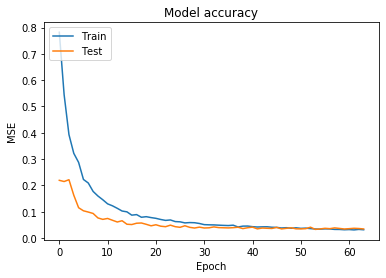

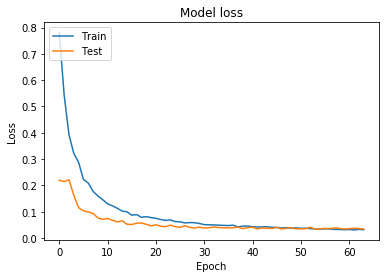

In [44]:
# Plot training & validation metrics
plt.plot(model4.history.history['mean_squared_error'])
plt.plot(model4.history.history['val_mean_squared_error'])
plt.title('Model accuracy')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model4.history.history['loss'])
plt.plot(model4.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [45]:
y_predict = model4.predict([X_test, k_modes_test[0], 
            k_modes_test[1], 
            k_modes_test[2],
            k_modes_test[3],
            k_modes_test[4],
            k_modes_test[5],
            k_modes_test[6],
            k_modes_test[7],
            k_modes_test[8],
            k_modes_test[9],
            k_modes_test[10],
            k_modes_test[11],
            k_modes_test[12],
            k_modes_test[13],
            k_modes_test[14],
            k_modes_test[15],
            k_modes_test[16],
            k_modes_test[17],
            k_modes_test[18],
            k_modes_test[19],
            k_modes_test[20],
            k_modes_test[21],
            k_modes_test[22],
            k_modes_test[23],
            k_modes_test[24],
            k_modes_test[25],
            k_modes_test[26],
            k_modes_test[27],
            k_modes_test[28],
            k_modes_test[29],
            k_modes_test[30],
            k_modes_test[31],
            k_modes_test[32],
           k_modes_test[33]])
y_predict_inv = scaler.inverse_transform(y_predict)
y_test_inv = scaler.inverse_transform(y_test)
print('RMSE de este modelo es:', np.sqrt(mean_squared_error(y_predict_inv, y_test_inv)))

RMSE de este modelo es: 18.97047670373243


In [46]:
#Visualización Predicción para un tiempo
sedes = Medellin['Sede Receptora'].unique()
Output = pd.DataFrame({'Sedes' : sedes})
Output['y_test'] = 0
Output['y_test'] = y_test_inv[0]
Output['y_predict'] = 0
Output['y_predict'] = y_predict_inv[0] 
Output['Diff'] = 0
Output['Diff'] = (y_test_inv[0] - y_predict_inv[0])
Output

Sedes  y_test   y_predict       Diff
0               Aranjuez    21.0   18.936443   2.063557
1                  Belén    56.0   48.585625   7.414375
2             Candelaria    11.0   16.539074  -5.539074
3               Castilla   181.0  143.562958  37.437042
4        Doce de Octubre    39.0   34.335930   4.664070
5               Laureles    12.0    5.601784   6.398216
6               Manrique    55.0   84.354523 -29.354523
7                Poblado     8.0    8.085537  -0.085537
8             San Javier    45.0   53.108707  -8.108707
9          Villa Hermosa     4.0    3.855061   0.144939
10          Buenos Aires     1.0    0.987521   0.012479
11            Santa Cruz    14.0    3.755905  10.244095
12               Popular     1.0    3.527474  -2.527474
13  San Antonio de Prado     8.0    6.479601   1.520399

## 6. Selección del modelo de redes neuronales multimodal


In [74]:
def TrainModel(X_train, y_train, AR, Num_comunas, numN_capa1=22, layer='Dense', embedding=False, dropout=0):
    keras.backend.clear_session()
    inputs_ts  = tf.keras.layers.Input(shape=[AR,Num_comunas], name="inputs_ts")
    inputs_kmodes = [tf.keras.layers.Input(Num_comunas) for i in range(name_dummies.size)]
    if layer == 'SimpleRNN':
        layer_ts = tf.keras.layers.SimpleRNN(numN_capa1, activation="selu", name="layer_ts")(inputs_ts)
        #layer_ts = tf.keras.layers.Dense(numN_capa1, activation="selu", name="layer_ts2")(layer_ts)
    elif layer == 'LSTM':
        layer_ts = tf.keras.layers.LSTM(numN_capa1, activation="selu", name="layer_ts")(inputs_ts)
        #layer_ts = tf.keras.layers.Dense(numN_capa1, activation="selu", name="layer_ts2")(layer_ts)
    elif layer == 'GRU':
        layer_ts = tf.keras.layers.GRU(numN_capa1, activation="selu", name="layer_ts")(inputs_ts)
        #layer_ts = tf.keras.layers.Dense(numN_capa1, activation="selu", name="layer_ts2")(layer_ts)
    else:
        layer_ts = tf.keras.layers.Dense(numN_capa1, activation="selu", name="layer_ts")(inputs_ts)
        layer_ts = tf.keras.layers.Flatten(name="layer_ts_flatten")(layer_ts)
        #layer_ts = tf.keras.layers.Dense(numN_capa1, activation="selu", name="layer_ts2")(layer_ts)
       
    layer_modas = tf.keras.layers.Concatenate(axis=1)(inputs_kmodes)
    if embedding:
        layer_modas = tf.keras.layers.Embedding(int(numN_capa1/2), numN_capa1)(layer_modas)
    else:
        layer_modas = tf.keras.layers.Dense(int(numN_capa1/2), activation="selu", name="layer_modas")(layer_modas)
        
    layer_modas = tf.keras.layers.Dropout(dropout)(layer_modas)
    layer_modas = tf.keras.layers.Flatten(name="layer_modas_flatten")(layer_modas) 
    
    join = tf.concat([layer_ts, layer_modas], axis=1)
    layer = tf.keras.layers.Dense(numN_capa1, activation="selu")(join)
    layer = tf.keras.layers.Dropout(0.1)(layer)
    
    outputs = tf.keras.layers.Dense(Num_comunas)(layer)
    model= tf.keras.Model(inputs=[inputs_ts, inputs_kmodes], outputs=outputs)
    Optimi = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(optimizer=Optimi,loss='mae',metrics=['mean_squared_error'])
    stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
    model.fit([X_train, k_modes_train[0], 
            k_modes_train[1], 
            k_modes_train[2],
            k_modes_train[3],
            k_modes_train[4],
            k_modes_train[5],
            k_modes_train[6],
            k_modes_train[7],
            k_modes_train[8],
            k_modes_train[9],
            k_modes_train[10],
            k_modes_train[11],
            k_modes_train[12],
            k_modes_train[13],
            k_modes_train[14],
            k_modes_train[15],
            k_modes_train[16],
            k_modes_train[17],
            k_modes_train[18],
            k_modes_train[19],
            k_modes_train[20],
            k_modes_train[21],
            k_modes_train[22],
            k_modes_train[23],
            k_modes_train[24],
            k_modes_train[25],
            k_modes_train[26],
            k_modes_train[27],
            k_modes_train[28],
            k_modes_train[29],
            k_modes_train[30],
            k_modes_train[31],
            k_modes_train[32],
           k_modes_train[33]], y_train,epochs=128, verbose=0, validation_split=0.1, callbacks=[stop])
    return model

In [75]:
k_modes_train = dummies_sep[:,2:train_size,:]
print('Tamaño de entrenamiento para la red', k_modes_train.shape)

k_modes_test = dummies_sep[:,train_size+2:,:]
print('Tamaño de entrenamiento para la red', k_modes_test.shape)

Tamaño de entrenamiento para la red (34, 232, 14)
Tamaño de entrenamiento para la red (34, 25, 14)


In [76]:
mse2 = np.zeros((4, 5, 6)) # X modelos, Y rezagos y Z numuero de nueronas por capa.
numN_capa1 = [4*Num_comunas, 5*Num_comunas, 10*Num_comunas, 14*Num_comunas, 15*Num_comunas, 20*Num_comunas]

for i, cell in enumerate(['Dense', 'SimpleRNN', 'LSTM','GRU']):
    for AR in range(1,6):
        look_back = AR #Equivale a número de periodos que veré hacia atrás para hacer una predicción
        X_train, y_train = create_datasetMV(trainN, look_back)
        X_test, y_test = create_datasetMV(testN, look_back)
        k_modes_train = dummies_sep[:,look_back:train_size,:]
        k_modes_test = dummies_sep[:,train_size+look_back:,:]
        print(X_test.shape)
        for j, numN in enumerate(numN_capa1):
            model = TrainModel(X_train, y_train, look_back, Num_comunas, numN, layer=cell, dropout=j/10)         
            y_predict = model.predict([X_test,k_modes_test[0], 
                k_modes_test[1], 
                k_modes_test[2],
                k_modes_test[3],
                k_modes_test[4],
                k_modes_test[5],
                k_modes_test[6],
                k_modes_test[7],
                k_modes_test[8],
                k_modes_test[9],
                k_modes_test[10],
                k_modes_test[11],
                k_modes_test[12],
                k_modes_test[13],
                k_modes_test[14],
                k_modes_test[15],
                k_modes_test[16],
                k_modes_test[17],
                k_modes_test[18],
                k_modes_test[19],
                k_modes_test[20],
                k_modes_test[21],
                k_modes_test[22],
                k_modes_test[23],
                k_modes_test[24],
                k_modes_test[25],
                k_modes_test[26],
                k_modes_test[27],
                k_modes_test[28],
                k_modes_test[29],
                k_modes_test[30],
                k_modes_test[31],
                k_modes_test[32],
               k_modes_test[33]])
            y_predict_inv = scaler.inverse_transform(y_predict)
            y_test_inv = scaler.inverse_transform(y_test)
            mse2[i,AR-1,j] = np.sqrt(mean_squared_error(y_predict_inv, y_test_inv))

(26, 1, 14)
(25, 2, 14)
(24, 3, 14)
(23, 4, 14)
(22, 5, 14)
(26, 1, 14)
(25, 2, 14)
(24, 3, 14)
(23, 4, 14)
(22, 5, 14)
(26, 1, 14)
(25, 2, 14)
(24, 3, 14)
(23, 4, 14)
(22, 5, 14)
(26, 1, 14)
(25, 2, 14)
(24, 3, 14)
(23, 4, 14)
(22, 5, 14)


In [77]:
mse2

array([[[19.88467124, 17.10153056, 18.81192141, 18.64000325,
         18.10749194, 17.96978687],
        [21.90018627, 18.21822263, 22.61202051, 19.11299332,
         23.06748472, 19.44178624],
        [20.04205561, 19.72784565, 19.35847437, 22.07088517,
         20.79201268, 22.32994614],
        [23.59833181, 23.78599081, 23.18352815, 22.65681227,
         24.06024949, 24.55281941],
        [23.00072475, 21.19691622, 20.73798519, 27.12586332,
         23.97402338, 23.07323659]],

       [[20.00214373, 18.31434767, 19.10168515, 18.06147466,
         18.49941552, 18.54310552],
        [26.62869464, 20.71296373, 19.18804301, 20.48127331,
         20.729488  , 30.5024061 ],
        [24.81428461, 21.10013164, 23.69538431, 19.79503894,
         27.98413407, 19.35787212],
        [25.59106872, 20.93739766, 20.26684519, 19.25139492,
         19.86514834, 21.55130573],
        [21.89966876, 21.43332012, 21.86949427, 20.99322137,
         22.86001427, 26.48955083]],

       [[21.31039359, 17.4

Conjunto de redes neuronales considerando variables categóricas con capa densa


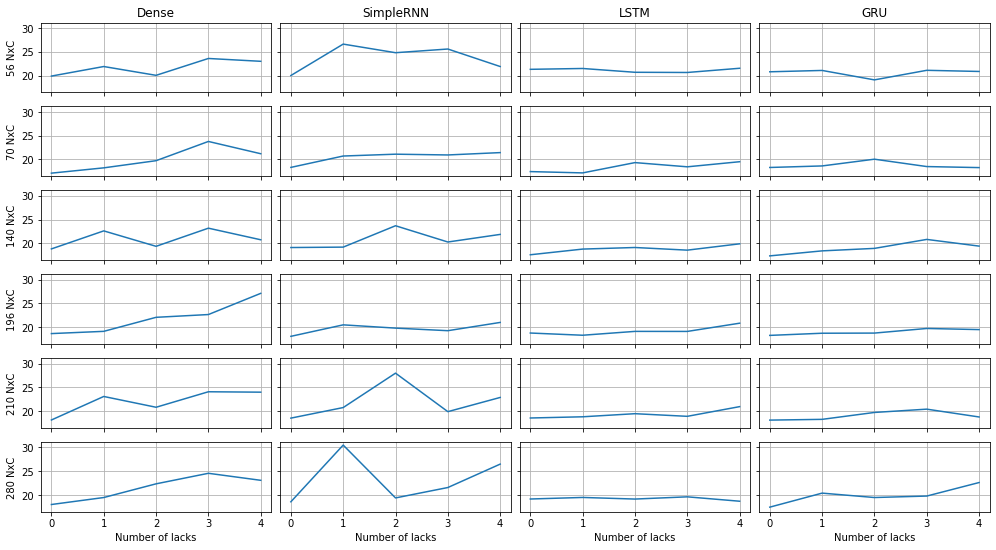

In [78]:
print('Conjunto de redes neuronales considerando variables categóricas con capa densa')

fig, axs = plt.subplots(6, 4, figsize=(17, 9), facecolor='w', edgecolor='k', sharex=True, sharey=True)
fig.subplots_adjust(hspace = .2, wspace=.04)
name_models = ['Dense', 'SimpleRNN', 'LSTM', 'GRU']

axs = axs.ravel()
aux_index_AR = 0
aux_index_mod = 0
for i in range(24):
    axs[i].plot(range(5),mse2[aux_index_AR,:,aux_index_mod])
    if i == 0:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    elif i == 4:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    elif i == 8:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    elif i == 12:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    elif i == 16:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    elif i == 20:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    elif i == 24:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    else:
        pass
    if i > 19:
        axs[i].set_xlabel('Number of lacks')
    if i <= 3:
        axs[i].set_title(name_models[aux_index_AR])
    axs[i].grid()
    aux_index_AR += 1
    if aux_index_AR%4 == 0:
        aux_index_AR = 0
        aux_index_mod += 1
    else:
        pass

In [79]:
mse3 = np.zeros((4, 5, 6)) # X modelos, Y rezagos y Z numuero de nueronas por capa.
numN_capa1 = [4*Num_comunas, 5*Num_comunas, 10*Num_comunas, 14*Num_comunas, 15*Num_comunas, 20*Num_comunas]

for i, cell in enumerate(['Dense', 'SimpleRNN', 'LSTM', 'GRU']):
    for AR in range(1,6):
        look_back = AR #Equivale a número de periodos que veré hacia atrás para hacer una predicción
        X_train, y_train = create_datasetMV(trainN, look_back)
        X_test, y_test = create_datasetMV(testN, look_back)
        k_modes_train = dummies_sep[:,look_back:train_size,:]
        k_modes_test = dummies_sep[:,train_size+look_back:,:]
        print(X_test.shape)
        for j, numN in enumerate(numN_capa1):
            model = TrainModel(X_train, y_train, look_back, Num_comunas, numN, dropout=j/10, layer=cell, embedding=True)         
            y_predict = model.predict([X_test,k_modes_test[0], 
                k_modes_test[1], 
                k_modes_test[2],
                k_modes_test[3],
                k_modes_test[4],
                k_modes_test[5],
                k_modes_test[6],
                k_modes_test[7],
                k_modes_test[8],
                k_modes_test[9],
                k_modes_test[10],
                k_modes_test[11],
                k_modes_test[12],
                k_modes_test[13],
                k_modes_test[14],
                k_modes_test[15],
                k_modes_test[16],
                k_modes_test[17],
                k_modes_test[18],
                k_modes_test[19],
                k_modes_test[20],
                k_modes_test[21],
                k_modes_test[22],
                k_modes_test[23],
                k_modes_test[24],
                k_modes_test[25],
                k_modes_test[26],
                k_modes_test[27],
                k_modes_test[28],
                k_modes_test[29],
                k_modes_test[30],
                k_modes_test[31],
                k_modes_test[32],
               k_modes_test[33]])
            y_predict_inv = scaler.inverse_transform(y_predict)
            y_test_inv = scaler.inverse_transform(y_test)
            mse3[i,AR-1,j] = np.sqrt(mean_squared_error(y_predict_inv, y_test_inv))
            print(mse3[i,AR-1,j])

(26, 1, 14)
18.32425975470907
18.622163187426498
18.992421547313366
27.95823266864364
17.95963132441161
30.439971088822233
(25, 2, 14)
18.6144432359712
19.15456418439723
20.30043468504304
22.551792615041563
20.148822575844125
29.02558913161104
(24, 3, 14)
18.92136265810384
19.20614951259263
20.016967342863616
20.657305446715217
20.52852722328203
28.29264197271426
(23, 4, 14)
19.326357459719407
19.454824197198427
19.897967409412644
22.32650301629338
38.71204712245363
24.382200184129243
(22, 5, 14)
19.898816173264958
19.133441488861653
21.004770114024854
21.717225738777216
29.977196353620077
27.236885919703102
(26, 1, 14)
19.75075137331269
18.453067351308427
17.05500011741476
18.032177632470535
38.1824851439111
33.56113374167082
(25, 2, 14)
18.66243918419427
19.613909541062988
18.851115373495443
20.51206194532302
20.951257074355958
20.335944268665706
(24, 3, 14)
19.82517907715562
19.49242359448083
18.56279479406118
21.231099667091218
19.224531450615522
48.276386661016474
(23, 4, 14)
18.8

In [80]:
mse3

array([[[18.32425975, 18.62216319, 18.99242155, 27.95823267,
         17.95963132, 30.43997109],
        [18.61444324, 19.15456418, 20.30043469, 22.55179262,
         20.14882258, 29.02558913],
        [18.92136266, 19.20614951, 20.01696734, 20.65730545,
         20.52852722, 28.29264197],
        [19.32635746, 19.4548242 , 19.89796741, 22.32650302,
         38.71204712, 24.38220018],
        [19.89881617, 19.13344149, 21.00477011, 21.71722574,
         29.97719635, 27.23688592]],

       [[19.75075137, 18.45306735, 17.05500012, 18.03217763,
         38.18248514, 33.56113374],
        [18.66243918, 19.61390954, 18.85111537, 20.51206195,
         20.95125707, 20.33594427],
        [19.82517908, 19.49242359, 18.56279479, 21.23109967,
         19.22453145, 48.27638666],
        [18.84016226, 20.49571892, 19.32242817, 26.17037506,
         36.95975929, 19.92512485],
        [20.85371952, 20.10134349, 20.03409529, 30.12853516,
         31.90265312, 31.72194296]],

       [[18.76246466, 18.9

Conjunto de redes neuronales considerando variables categóricas con capa embedding


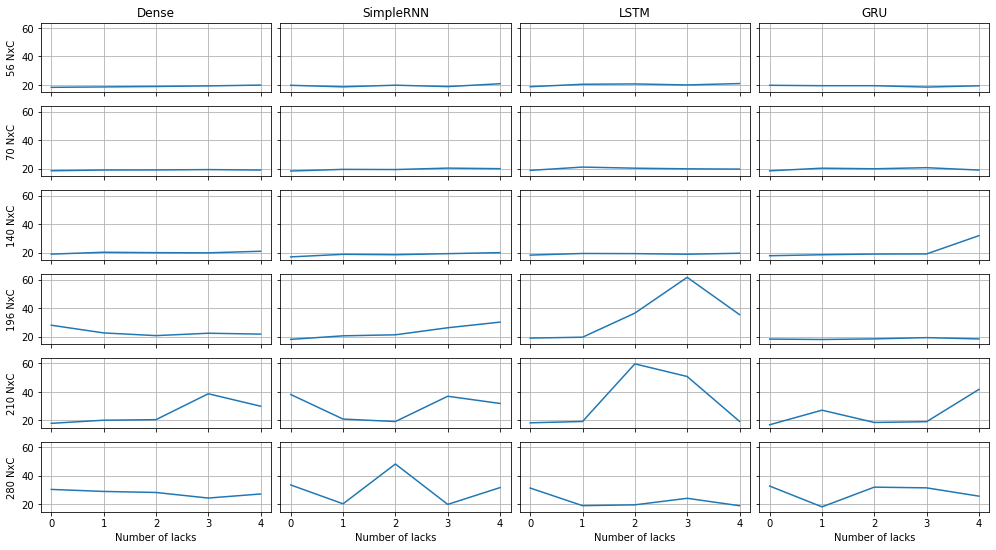

In [81]:
print('Conjunto de redes neuronales considerando variables categóricas con capa embedding')

fig, axs = plt.subplots(6, 4, figsize=(17, 9), facecolor='w', edgecolor='k', sharex=True, sharey=True)
fig.subplots_adjust(hspace = .2, wspace=.04)
name_models = ['Dense', 'SimpleRNN', 'LSTM', 'GRU']

axs = axs.ravel()
aux_index_AR = 0
aux_index_mod = 0
for i in range(24):
    axs[i].plot(range(5),mse3[aux_index_AR,:,aux_index_mod])
    if i == 0:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    elif i == 4:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    elif i == 8:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    elif i == 12:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    elif i == 16:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    elif i == 20:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    elif i == 24:
        axs[i].set_ylabel(str(numN_capa1[aux_index_mod]) + ' NxC')
    else:
        pass
    if i > 19:
        axs[i].set_xlabel('Number of lacks')
    if i <= 3:
        axs[i].set_title(name_models[aux_index_AR])
    axs[i].grid()
    aux_index_AR += 1
    if aux_index_AR%4 == 0:
        aux_index_AR = 0
        aux_index_mod += 1
    else:
        pass

## 7. ELECCIÓN DEL MEJOR MODELO

De acuerdo al menor RMSE y todas las configuraciones propuestas de modelos, número de neuronas y rezagos, se elige el mejor modelo. Para esta decisión se dará prelación al modelo de menor complejidad. De los 3 grupos de modelo se hará un **top 3 de cada uno**, de cada top se elige el de **menor complejidad**, y luego se compara los elijos de cada grupo y se toma el mejor RMSE.

In [33]:
mse

NameError: name 'mse' is not defined

In [83]:
mse[0]

array([[18.58113216, 17.78138287, 17.67753349, 18.04738971, 17.97540116,
        17.03670723],
       [18.50672512, 18.09845982, 17.58361234, 18.10237123, 19.22679921,
        19.86155411],
       [19.94724025, 18.80266741, 18.85136475, 18.73422199, 19.11195913,
        18.380913  ],
       [18.84395835, 18.84060584, 20.26217081, 18.93701584, 18.92040718,
        19.39696185],
       [22.3199811 , 20.72439152, 20.19571509, 20.10028459, 21.25341388,
        20.23873896]])

In [84]:
def smallestN_indices(a, N):
    """
    Función para entregrar arreglo de N filas con la ubicación de 
    del N_ésimo menor valor. Sirve para N_dimensiones    
    """
    idx = a.ravel().argsort()[:N]
    return np.stack(np.unravel_index(idx, a.shape)).T

In [85]:
print ('GRUPO UNO - REDES UNICAMENTE CON SERIES DE TIEMPO')
numN_capa1 = [1*Num_comunas, 2*Num_comunas, 3*Num_comunas, 4*Num_comunas, 5*Num_comunas, 10*Num_comunas]


top = 3
top_model1 = smallestN_indices(mse, top)
for i in range(top):
    aux = top_model1[i]
    print('El puesto: ',i+1 , 'es para el modelo: ', str(name_models[aux[0]]), 
         'con : ', aux[1]+1, 'rezagos y # de neuronas por capa de: ', numN_capa1[aux[2]], 
          'MSE:', mse[aux[0], aux[1], aux[2]])

GRUPO UNO - REDES UNICAMENTE CON SERIES DE TIEMPO
El puesto:  1 es para el modelo:  SimpleRNN con :  1 rezagos y # de neuronas por capa de:  14 MSE: 16.77776614050148
El puesto:  2 es para el modelo:  GRU con :  1 rezagos y # de neuronas por capa de:  70 MSE: 16.793200372981165
El puesto:  3 es para el modelo:  LSTM con :  1 rezagos y # de neuronas por capa de:  70 MSE: 16.97614722269568


In [86]:
print ('GRUPO DOS - RED CON SERIE DE TIEMPO Y CATEGORICAS (Por capas densas)')
numN_capa1 = [4*Num_comunas, 5*Num_comunas, 10*Num_comunas, 15*Num_comunas, 20*Num_comunas, 25*Num_comunas]

top = 3
top_model2 = smallestN_indices(mse2, top)
for i in range(top):
    aux = top_model2[i]
    print('El puesto: ',i+1 , 'es para el modelo: ', str(name_models[aux[0]]), 
         'con : ', aux[1]+1, 'rezagos y # de neuronas por capa de: ', numN_capa1[aux[2]], 
          'MSE:', mse2[aux[0], aux[1], aux[2]])

GRUPO DOS - RED CON SERIE DE TIEMPO Y CATEGORICAS (Por capas densas)
El puesto:  1 es para el modelo:  Dense con :  1 rezagos y # de neuronas por capa de:  70 MSE: 17.101530564179146
El puesto:  2 es para el modelo:  LSTM con :  2 rezagos y # de neuronas por capa de:  70 MSE: 17.15342005442114
El puesto:  3 es para el modelo:  GRU con :  1 rezagos y # de neuronas por capa de:  140 MSE: 17.33948228739483


In [87]:
print ('GRUPO TRES - RED CON SERIE DE TIEMPO Y CATEGORICAS (Por embeddings)')

top = 3
top_model3 = smallestN_indices(mse3, top)
for i in range(top):
    aux = top_model3[i]
    print('El puesto: ',i+1 , 'es para el modelo: ', str(name_models[aux[0]]), 
         'con : ', aux[1]+1, 'rezagos y # de neuronas por capa de: ', numN_capa1[aux[2]], 
          'MSE:', mse3[aux[0], aux[1], aux[2]])

GRUPO TRES - RED CON SERIE DE TIEMPO Y CATEGORICAS (Por embeddings)
El puesto:  1 es para el modelo:  GRU con :  1 rezagos y # de neuronas por capa de:  280 MSE: 16.962740295436205
El puesto:  2 es para el modelo:  SimpleRNN con :  1 rezagos y # de neuronas por capa de:  140 MSE: 17.05500011741476
El puesto:  3 es para el modelo:  GRU con :  1 rezagos y # de neuronas por capa de:  140 MSE: 17.863252971274363


https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

https://mlfromscratch.com/activation-functions-explained/#selu


## 8. PREDICCIÓN POR ESTACIÓN

Una vez elegido el modelo se procede con la predicción por cada una de las estaciones y se calcula de forma independiente el RMSE y MAPE

In [19]:
#Mejores parámetros de la red neuronal
look_back = 2 
numN = 28
X_train, y_train = create_datasetMV(trainN, look_back)
X_test, y_test = create_datasetMV(testN, look_back)

In [20]:
model_final = TrainModel_ts(X_train, y_train, look_back, Num_comunas, numN, layer='LSTM')
y_predict_final = model_final.predict(X_test)

In [21]:
y_predict_inv = scaler.inverse_transform(y_predict_final)
y_test_inv = scaler.inverse_transform(y_test)

In [22]:
for i in range(Num_comunas):
    print(i,'SEDE:',df.columns[i],
          ':\n     RSME: ', round(np.sqrt(mean_squared_error(y_predict_inv[:,i], y_test_inv[:,i])),4), 
          'MAPE', round(mean_absolute_percentage_error(y_predict_inv[:,i],y_test_inv[:,i]), 4))
          #'MAPE', round(mean_absolute_percentage_error(y_test_inv[:,i],y_predict_inv[:,i]), 4))

0 SEDE: Aranjuez :
     RSME:  34.1958 MAPE 0.8303
1 SEDE: Belén :
     RSME:  13.9267 MAPE 0.1963
2 SEDE: Buenos Aires :
     RSME:  8.5421 MAPE 0.5978
3 SEDE: Candelaria :
     RSME:  20.8368 MAPE 0.0942
4 SEDE: Castilla :
     RSME:  13.3156 MAPE 0.267
5 SEDE: Doce de Octubre :
     RSME:  4.3429 MAPE 0.4122
6 SEDE: Laureles :
     RSME:  44.4966 MAPE 0.282
7 SEDE: Manrique :
     RSME:  4.6249 MAPE 0.5637
8 SEDE: Poblado :
     RSME:  17.488 MAPE 0.2229
9 SEDE: Popular :
     RSME:  2.7853 MAPE 0.6642
10 SEDE: San Antonio de Prado :
     RSME:  1.7776 MAPE 0.5681
11 SEDE: San Javier :
     RSME:  5.432 MAPE 0.5285
12 SEDE: Santa Cruz :
     RSME:  3.0103 MAPE 0.724
13 SEDE: Villa Hermosa :
     RSME:  6.7352 MAPE 0.773


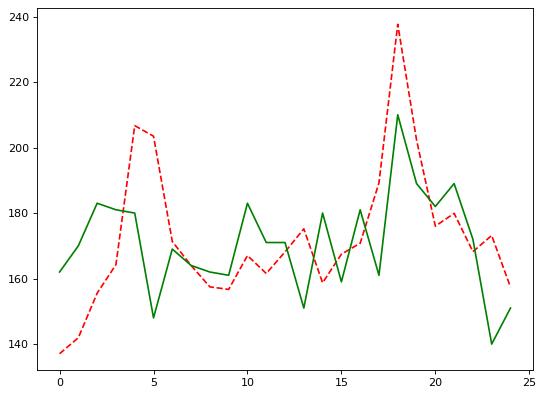

In [23]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

SEDE = 3
plt.plot(y_predict_inv[:,SEDE], color='red', linestyle='dashed')
plt.plot(y_test_inv[:,SEDE], color='green')

In [24]:
np.savetxt("foo.csv", y_predict_inv, delimiter=",")

In [25]:
print(round(np.sqrt(mean_squared_error(y_predict_inv[:], y_test_inv[:])),4))

17.8658


In [26]:
np.savetxt("footest.csv", y_test_inv, delimiter=",")

In [27]:
df.columns

Index(['Aranjuez', 'Belén', 'Buenos Aires', 'Candelaria', 'Castilla',
       'Doce de Octubre', 'Laureles', 'Manrique', 'Poblado', 'Popular',
       'San Antonio de Prado', 'San Javier', 'Santa Cruz', 'Villa Hermosa'],
      dtype='object')

In [ ]:
look_back = 1 #Equivale a número de periodos que veré hacia atrás para hacer una predicción

print('-----------------------TIME SERIES DATA-----------------------------')
X_train, y_train = create_datasetMV(trainN, look_back)
X_test, y_test = create_datasetMV(testN, look_back)
print(train.shape)
print(trainN.shape)
print('Datos para red neural: Entrada', X_train.shape)
print('Datos para red neural: Salida', y_train.shape)
print('---')
print(test.shape)
print(testN.shape)
print('Datos para red neural: Entrada', X_test.shape)
print('Datos para red neural: Salida', y_test.shape)



print('-------------------------DUMMY DATA--------------------------------')
#Se toma la misma cantidad de datos para entrenamiento, pero se debe tener presente que como se está tomando
#el dato anterior para predecir el siguiente, no tomamos el primer valor de la serie de Kmodes, por eso el 1

k_modes_train = dummies_sep[:,look_back:train_size,:]
print('Tamaño de entrenamiento para la red', k_modes_train.shape)

k_modes_test = dummies_sep[:,train_size+look_back:,:]
print('Tamaño de entrenamiento para la red', k_modes_test.shape)

In [ ]:
AR = look_back

keras.backend.clear_session()

inputs_ts  = tf.keras.layers.Input(shape=[AR,Num_comunas], name="inputs_ts")
layer_ts = tf.keras.layers.GRU(50, activation="selu", name="layer_ts")(inputs_ts)
#layer_ts = tf.keras.layers.Dropout(0.1)(inputs_ts)
layer_ts = tf.keras.layers.Flatten(name="layer_ts_flatten")(layer_ts)

inputs_kmodes = [tf.keras.layers.Input(Num_comunas) for i in range(name_dummies.size)]
#layer_modas = tf.keras.layers.Concatenate(axis=1)(inputs_kmodes)
layer_modas = tf.keras.layers.Average()(inputs_kmodes)
layer_modas = tf.keras.layers.Dense(50, activation="selu", name="layer_modas")(layer_modas)
#layer_modas = tf.keras.layers.Embedding(34, 106)(kmodes_concat)
layer_modas = tf.keras.layers.Dropout(0.5)(layer_modas)
layer_modas = tf.keras.layers.Flatten(name="layer_modas_flatten")(layer_modas)   

#Se concatenan ambos modelos
join =  tf.keras.layers.Average()([layer_ts, layer_modas])
#join = tf.concat([layer_ts, layer_modas], axis=1)
layer = tf.keras.layers.Dense(22, activation="selu")(join)
layer = tf.keras.layers.Dropout(0.2)(layer)

outputs = tf.keras.layers.Dense(Num_comunas)(layer)

model4 = tf.keras.Model(inputs=[inputs_ts, inputs_kmodes], outputs=outputs)
model4.summary()

In [ ]:
k_modes_train_split = [k_modes_train[i] for i in range(name_dummies.size)]


model4.compile(optimizer="adam", loss='mse', metrics=['mean_squared_error'])
#model4.fit([X_train, k_modes_train], y_train,epochs=20, verbose=1, validation_split=0.1)
model4.fit([X_train, k_modes_train[0], 
            k_modes_train[1], 
            k_modes_train[2],
            k_modes_train[3],
            k_modes_train[4],
            k_modes_train[5],
            k_modes_train[6],
            k_modes_train[7],
            k_modes_train[8],
            k_modes_train[9],
            k_modes_train[10],
            k_modes_train[11],
            k_modes_train[12],
            k_modes_train[13],
            k_modes_train[14],
            k_modes_train[15],
            k_modes_train[16],
            k_modes_train[17],
            k_modes_train[18],
            k_modes_train[19],
            k_modes_train[20],
            k_modes_train[21],
            k_modes_train[22],
            k_modes_train[23],
            k_modes_train[24],
            k_modes_train[25],
            k_modes_train[26],
            k_modes_train[27],
            k_modes_train[28],
            k_modes_train[29],
            k_modes_train[30],
            k_modes_train[31],
            k_modes_train[32],
           k_modes_train[33]], 
           y_train,epochs=64, verbose=1, validation_split=0.1)

In [ ]:
y_predict = model4.predict([X_test,k_modes_test[0],
                           k_modes_test[1],
                           k_modes_test[2],
                           k_modes_test[3],
                           k_modes_test[4],
                           k_modes_test[5],
                           k_modes_test[6],
                           k_modes_test[7],
                           k_modes_test[8],
                           k_modes_test[9],
                           k_modes_test[10],
                           k_modes_test[11],
                           k_modes_test[12],
                           k_modes_test[13],
                           k_modes_test[14],
                           k_modes_test[15],
                           k_modes_test[16],
                           k_modes_test[17],
                           k_modes_test[18],
                           k_modes_test[19],
                           k_modes_test[20],
                           k_modes_test[21],
                           k_modes_test[22],
                           k_modes_test[23],
                           k_modes_test[24],
                           k_modes_test[25],
                           k_modes_test[26],
                           k_modes_test[27],
                           k_modes_test[28],
                           k_modes_test[29],
                           k_modes_test[30],
                           k_modes_test[31],
                           k_modes_test[32],
                           k_modes_test[33]])
y_predict_inv = scaler.inverse_transform(y_predict)
y_test_inv = scaler.inverse_transform(y_test)

In [ ]:
np.sqrt(mean_squared_error(y_predict_inv, y_test_inv))